### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

- [My Github Repo](https://github.com/heyashy/LSE_DA_COVID_analysis)
- Screenshot demo

!['My Github screenshot](https://github.com/heyashy/LSE_DA_COVID_analysis/blob/main/screenshot.jpg?raw=true)

---
### 1.2) The role of GitHub
<p>Git was developed by Linus Torvald, the creator of Linux, in 2005 and is a software that enables tracking for changes to a set of files and is a critial part of the development cycle of any application developed collaboratively by an orginsiation. Git's is essentialy a version control softrware that allows the tracking, commiting and merging of changes whilst maintaing speed, efficieny and transparency in the development cycle.</p>

<p>Git is a defacto standard and there are many options to allow it's implimentation</p>

- GitHub
- GitLab
- BitBucket
- Google Cloud Source Repositories
- Phabricator
- RhodeCode

are just some of the options that developers can use to impliment Git in thier projects. More information on Git can be found here on the Wikipedia page by [clicking here](https://en.wikipedia.org/wiki/Git).

---
### 2.1) Assignment 2: Import and explore the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from helper import draw_group_chart, normalize, normalize_simple# Custom Module for data wrangling

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi":144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.color_palette("Set2")
sns.despine()

cov = pd.read_csv('./covid_19_uk_cases.csv')
vac = pd.read_csv('./covid_19_uk_vaccinated.csv')



<Figure size 432x288 with 0 Axes>

In [2]:
print('Shape: {} \n'.format(cov.shape))
print(cov.dtypes)
cov['Date'] = pd.to_datetime(cov['Date'])
print(cov.dtypes)


Shape: (7584, 12) 

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object


In [3]:
print('Shape: {} \n'.format(vac.shape))
print(vac.dtypes)

Shape: (7584, 11) 

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [4]:
# Date is an object and should be a datetime object
# Start by checking the head to see what format the data is in 
print(vac.head(1))
# Correct the format
vac["Date"] = pd.to_datetime(vac["Date"])
#Check
print(vac.dtypes)
print(vac.head(1))

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   

   Vaccinated  First Dose  Second Dose  
0           0           0            0  
Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object
  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.220

In [5]:
print(cov.head(5))
print(cov.tail(5))
print(vac.head(5))
print(vac.tail(5))

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code       Date  \
0  Latin America and the Caribbean                        29 2020-01-22   
1  Latin America and the Caribbean                        29 2020-01-23   
2  Latin America and the Caribbean                        29 2020-01-24   
3  Latin America and the Caribbean                        29 2020-01-25   
4  Latin America and the Caribbean                        29 2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        0.0   

### Check for Nan values

In [6]:
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [7]:
# Fix this
# We could make them all zero
# cov[cov.isna().any(axis=1)] = 0
# However we are going to fill them with mean values
cov['Deaths'].fillna(method='bfill', inplace=True)
cov['Cases'].fillna(method='bfill', inplace=True)
cov['Recovered'].fillna(method='bfill', inplace=True)
cov['Hospitalised'].fillna(method='bfill', inplace=True)
print(cov.isna().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64


In [8]:
vac.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [9]:
cov[['Deaths', 'Cases', 'Recovered', 'Hospitalised']] = cov[['Deaths', 'Cases', 'Recovered', 'Hospitalised']].astype(int)

In [10]:
gcov_df = cov[cov['Province/State'] == 'Gibraltar']

In [11]:
pd.set_option("display.max_rows", None)
# gcov_df 
gcov_df.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                               int32
Cases                                int32
Recovered                            int32
Hospitalised                         int32
dtype: object

In [12]:

gcov_df = gcov_df[['Date', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]
gcov_df.set_index('Date', inplace=True)

In [13]:
gcov_df.tail()

,Deaths,Cases,Recovered,Hospitalised
Date,,,,
2021-10-10,97,5626,0,858
2021-10-11,97,5655,0,876
2021-10-12,97,5682,0,876
2021-10-13,97,5707,0,0
2021-10-14,97,5727,0,0


In [14]:
gcov_df.describe().apply(lambda x: x.astype('int'))

,Deaths,Cases,Recovered,Hospitalised
count,632,632,632,632
mean,40,2237,1512,1027
std,45,2136,1817,1145
min,0,0,0,0
25%,0,177,109,157
50%,5,1036,323,675
75%,94,4286,4122,1548
max,97,5727,4670,4907


In [15]:
print("start date: {} / End Date: {}".format(gcov_df.index.min(),gcov_df.index.max()))


start date: 2020-01-22 00:00:00 / End Date: 2021-10-14 00:00:00


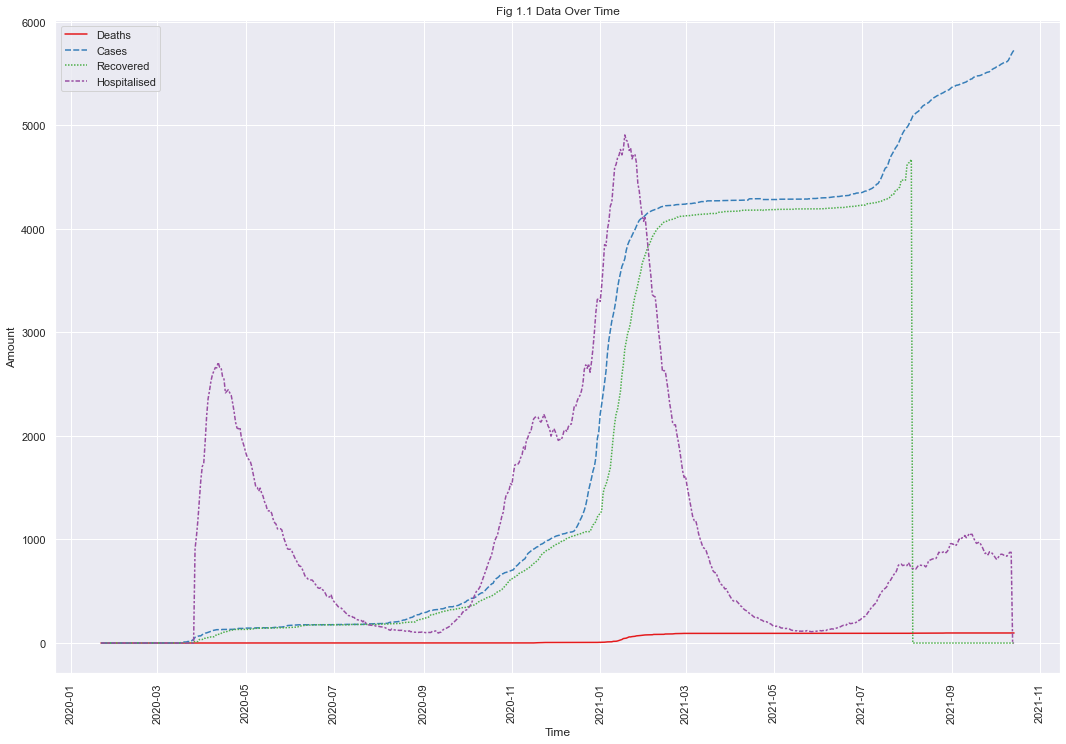

In [16]:

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=gcov_df, palette='Set1') 
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()

#

# Initial findings
<p>Our data set contains time-series data from 2020-01-22 until 2021-10-15. In the above example we examined the case, death, recovery and hospitalisation data fro Gibralter. From the above chart we can extrapulate:</p>

- There were disproportionate hospitalisations at the start of the data set
- Hospitalisations don't mimic cases. We should look into this more
- Deats are relatively low
- Recvoered cases closley follow reported cases but suddenly fall off in a sharp drop. This should be looked into further

<p>We may have possible errors and missing information in our data that would need to be examined further. This includes:</p>

- Mismatch of hospitalisations to case numbers
- Sudden drop in recovered data

<p>Things to look at include:</p>
- Why there was a sudden spike of cases mid way through the data set
- Hospitalisations exceed case numbers several times and actually dropped to nearlly zero at the peak of the cases

---
## 3) Assignment activity 3: 


In [17]:
cov.drop(['Lat', 'Long', 'Intermediate Region Code'], axis=1, inplace=True, errors='ignore')
vac.drop(['Lat', 'Long', 'Intermediate Region Code'], axis=1, inplace=True, errors='ignore')
if vac.index.name != 'Date': vac.set_index('Date', inplace=True)
if cov.index.name != 'Date': cov.set_index('Date', inplace=True)
t1 = cov.groupby(['Province/State'])['Province/State'].count()
t2 = vac.groupby(['Province/State'])['Province/State'].count()
t1.compare(t2)

,self,other
Province/State,,


In [18]:
vac2 = vac[['Province/State', 'Sub-region Name', 'Vaccinated', 'First Dose', 'Second Dose']]

In [19]:
df = pd.merge(cov, vac2, on=['Date', 'Sub-region Name', 'Province/State'], how='right')
df.drop(['ISO 3166-1 Alpha 3-Codes'], axis=1, inplace=True)


In [20]:
df.dtypes

Province/State     object
Country/Region     object
Sub-region Name    object
Deaths              int32
Cases               int32
Recovered           int32
Hospitalised        int32
Vaccinated          int64
First Dose          int64
Second Dose         int64
dtype: object

In [21]:
count = df.groupby(['Province/State'])['Province/State'].count()
print(count)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
Name: Province/State, dtype: int64


<mark>All the datapoints merged successfully</mark>

## <em><u>Quick View All Data</u></em>:
Y Scales have not been normalised as we are looking for errors in the data set

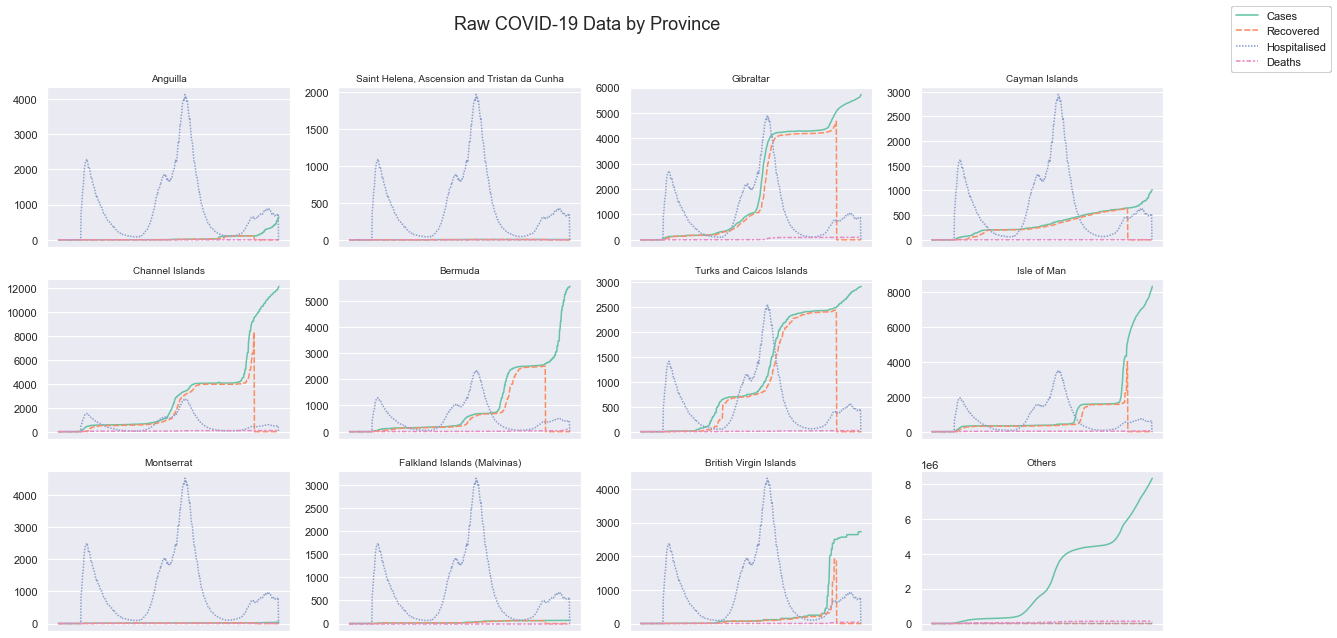

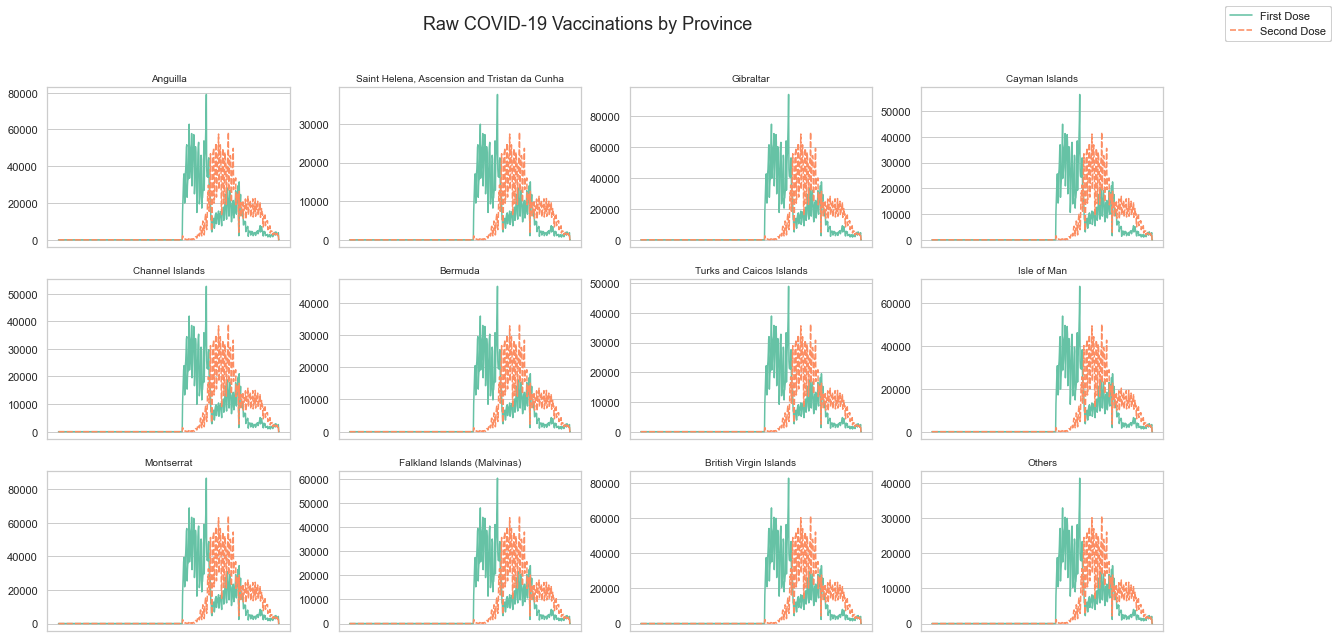

In [22]:
draw_group_chart(df, ['Cases','Recovered','Hospitalised', 'Deaths'], title='Raw COVID-19 Data by Province')
draw_group_chart(df, ['First Dose','Second Dose'], title='Raw COVID-19 Vaccinations by Province')

### <mark><strong>OTHERS</strong> is heavily skewing the data</mark><br>
### <mark>There is an odd spike in each of the Vaccinated data that needs to be normalised</mark><br>

In [23]:
for province in df['Province/State'].unique():
    max = df[(df['Province/State'] == province)]['First Dose'].max()
    print("{} Outlier: {} ".format(province, max))
    df.loc[(df['Province/State'] == province) & (df['First Dose'] == max), 'First Dose']= np.NaN
    df['First Dose'].fillna(method='bfill', inplace=True)
    max = df[(df['Province/State'] == province)]['First Dose'].max()
    print("{} Corrected: {}".format(province, max))

Anguilla Outlier: 78992 
Anguilla Corrected: 64568.0
Bermuda Outlier: 45138.0 
Bermuda Corrected: 36896.0
British Virgin Islands Outlier: 82754.0 
British Virgin Islands Corrected: 67642.0
Cayman Islands Outlier: 56423.0 
Cayman Islands Corrected: 46120.0
Channel Islands Outlier: 52662.0 
Channel Islands Corrected: 43045.0
Falkland Islands (Malvinas) Outlier: 60185.0 
Falkland Islands (Malvinas) Corrected: 49194.0
Gibraltar Outlier: 94038.0 
Gibraltar Corrected: 76866.0
Isle of Man Outlier: 67708.0 
Isle of Man Corrected: 55344.0
Montserrat Outlier: 86515.0 
Montserrat Corrected: 70717.0
Saint Helena, Ascension and Tristan da Cunha Outlier: 37615.0 
Saint Helena, Ascension and Tristan da Cunha Corrected: 30746.0
Turks and Caicos Islands Outlier: 48900.0 
Turks and Caicos Islands Corrected: 39970.0
Others Outlier: 41377.0 
Others Corrected: 33821.0


In [24]:
normalised_df = normalize(df, ['Cases','Recovered','Hospitalised', 'Deaths', 'First Dose', 'Second Dose'])
normalised_df.reset_index(inplace=True)
normalised_df['Month']=pd.to_datetime(normalised_df['Date']+pd.offsets.MonthBegin(0))
normalised_df.set_index('Month', inplace=True)
normalised_df.head()

,Date,Province/State,Country/Region,Sub-region Name,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
Month,,,,,,,,,,,
2020-02-01,2020-01-22,Anguilla,United Kingdom,Latin America and the Caribbean,0.0,0.0,0.0,0.0,0,0.0,0.0
2020-02-01,2020-01-23,Anguilla,United Kingdom,Latin America and the Caribbean,0.0,0.0,0.0,0.0,0,0.0,0.0
2020-02-01,2020-01-24,Anguilla,United Kingdom,Latin America and the Caribbean,0.0,0.0,0.0,0.0,0,0.0,0.0
2020-02-01,2020-01-25,Anguilla,United Kingdom,Latin America and the Caribbean,0.0,0.0,0.0,0.0,0,0.0,0.0
2020-02-01,2020-01-26,Anguilla,United Kingdom,Latin America and the Caribbean,0.0,0.0,0.0,0.0,0,0.0,0.0


## Checking the data

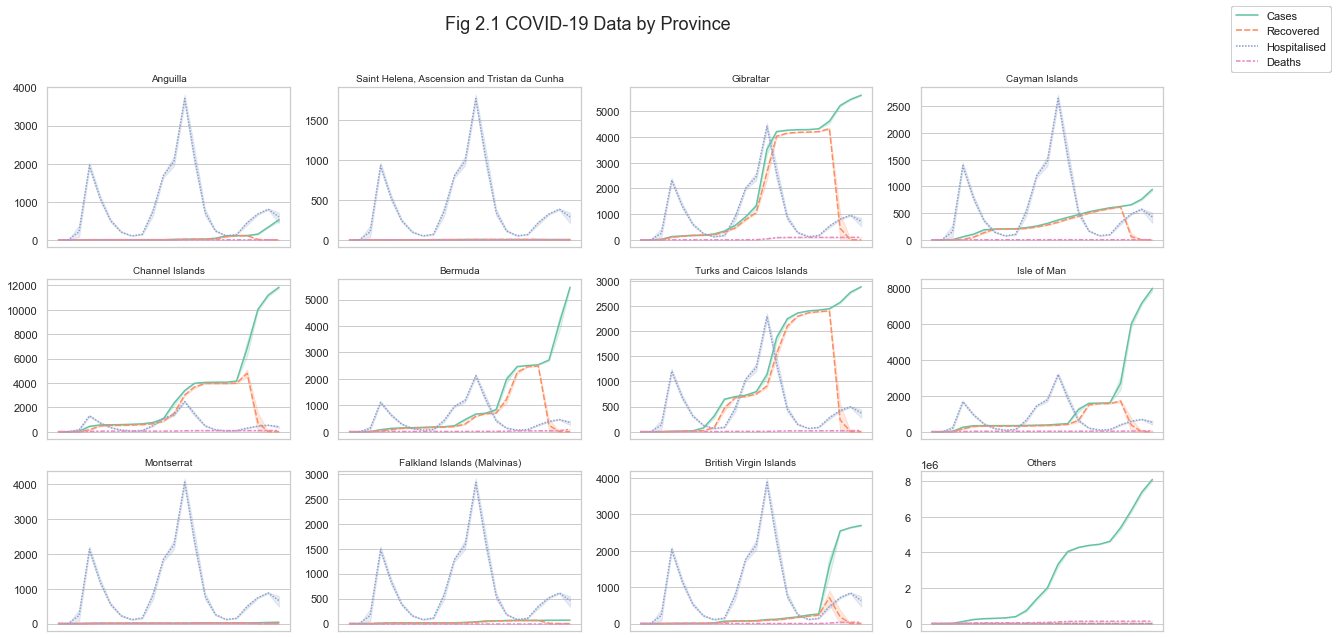

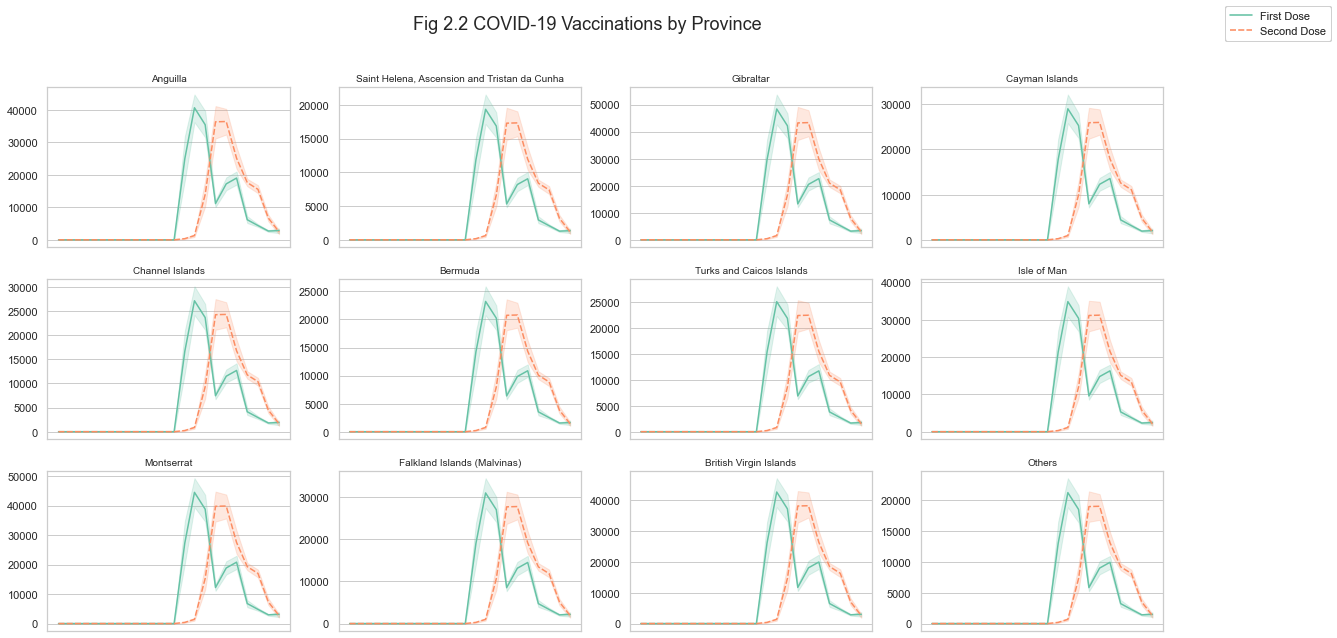

In [25]:
df.reset_index(inplace=True)
df['Month']=pd.to_datetime(df['Date']+pd.offsets.MonthBegin(0))
df.set_index('Month', inplace=True)
draw_group_chart(df, ['Cases','Recovered','Hospitalised', 'Deaths'], title='Fig 2.1 COVID-19 Data by Province')
draw_group_chart(df, ['First Dose','Second Dose'], title='Fig 2.2 COVID-19 Vaccinations by Province')

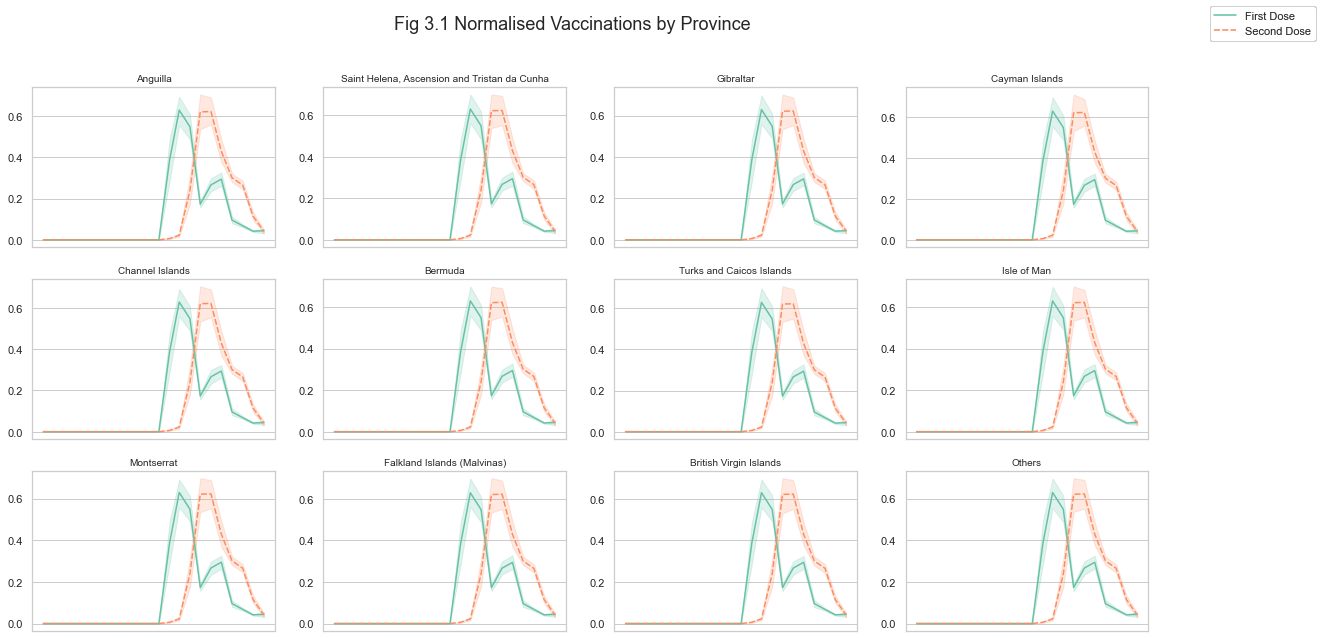

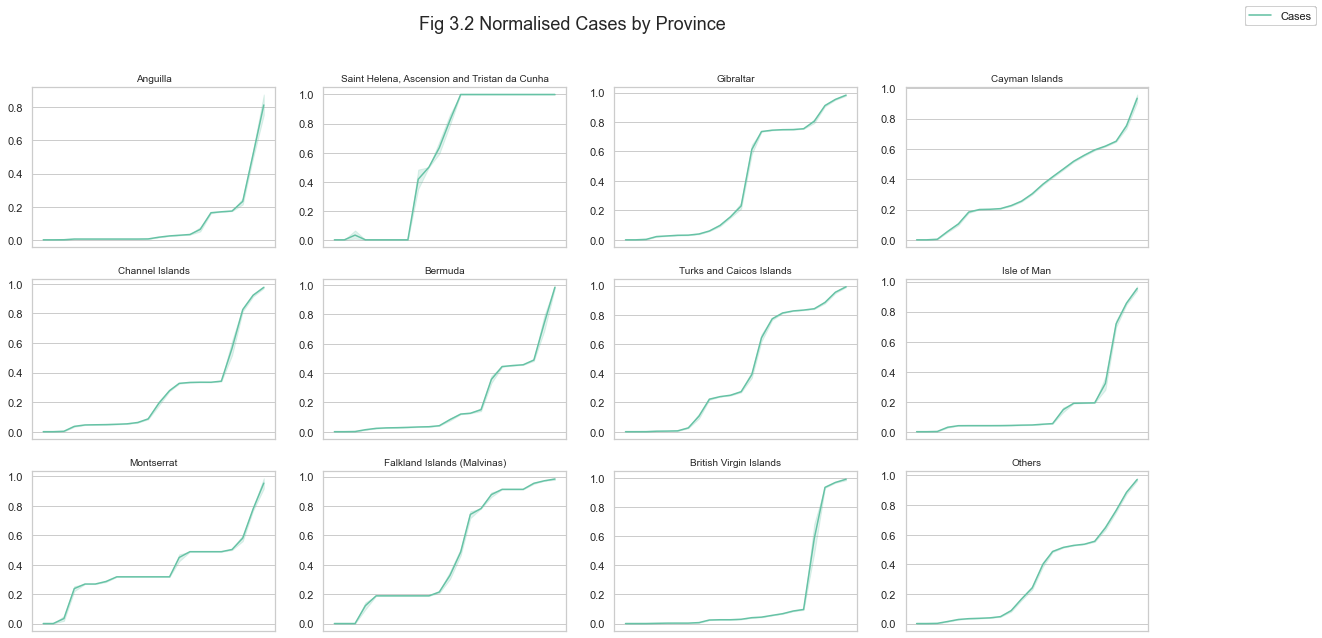

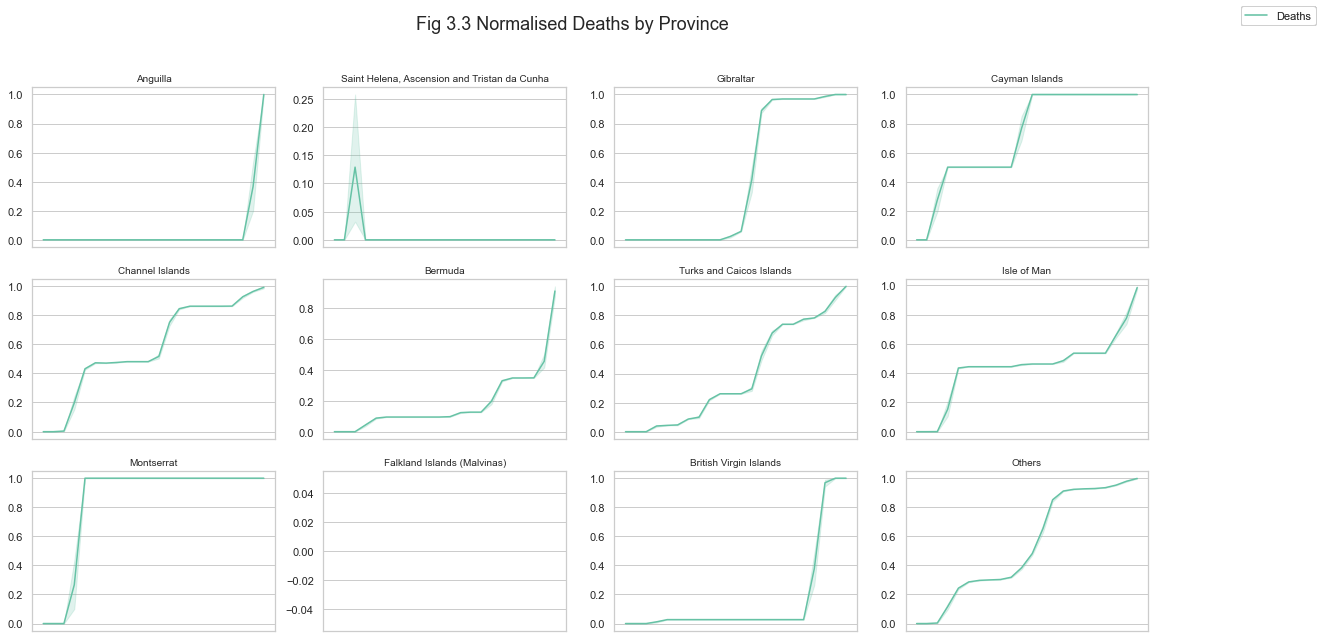

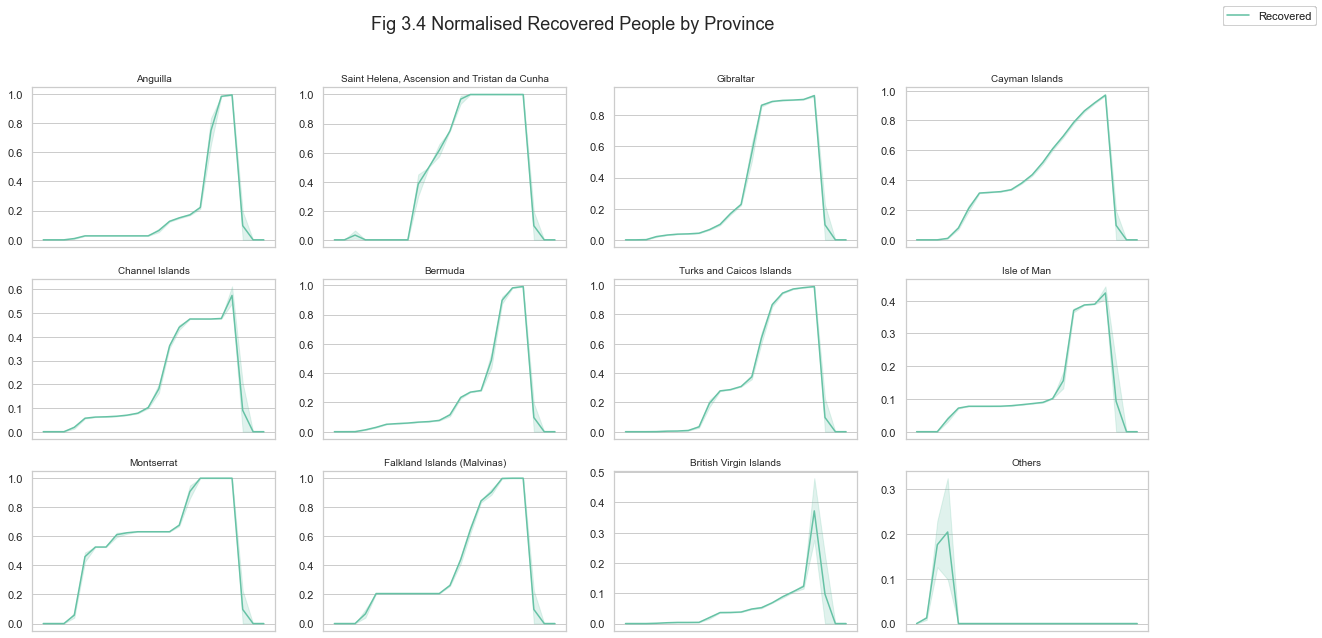

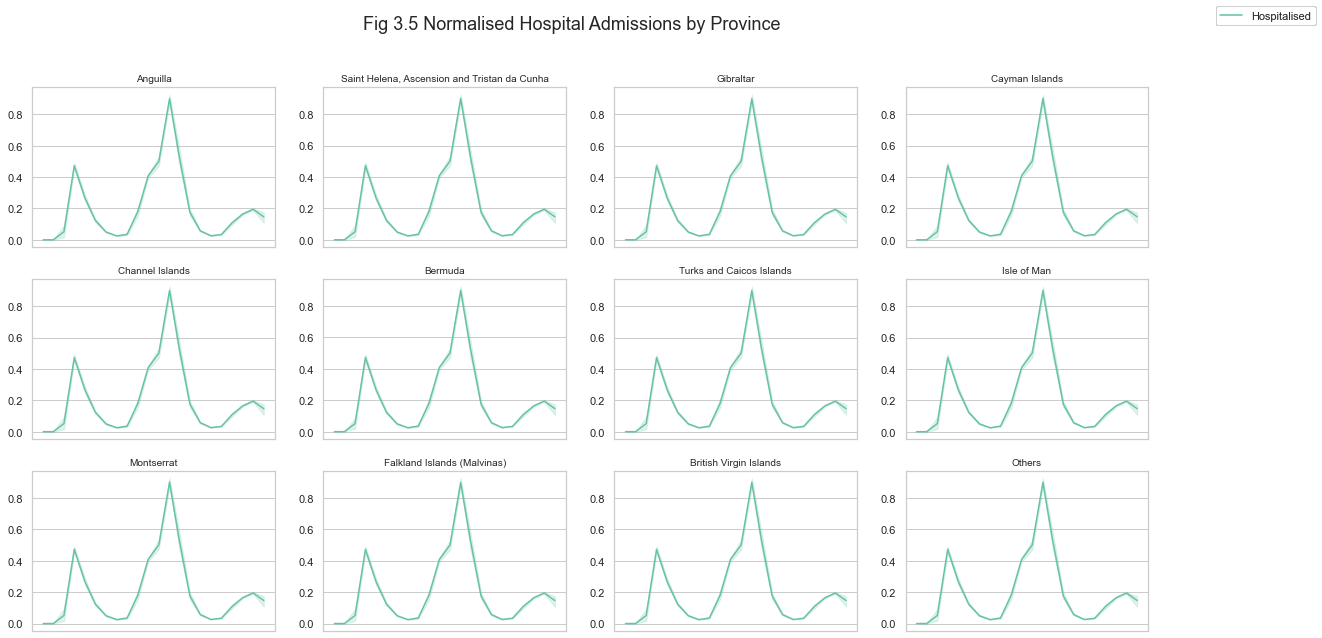

In [26]:
draw_group_chart(normalised_df,  ['First Dose','Second Dose'], title='Fig 3.1 Normalised Vaccinations by Province')
draw_group_chart(normalised_df,  ['Cases'], title='Fig 3.2 Normalised Cases by Province')
draw_group_chart(normalised_df,  ['Deaths'], title='Fig 3.3 Normalised Deaths by Province')
draw_group_chart(normalised_df,  ['Recovered'], title='Fig 3.4 Normalised Recovered People by Province')
draw_group_chart(normalised_df,  ['Hospitalised'], title='Fig 3.5 Normalised Hospital Admissions by Province')




## Checking Others

In [27]:
ndf = df[df['Province/State'] != 'Others'].groupby('Date').sum()
ndf.reset_index(inplace=True)
ndf['Month']=pd.to_datetime(ndf['Date']+pd.offsets.MonthBegin(0))
ndf.set_index('Month', inplace=True)
ndf.head()

,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
Month,,,,,,,,
2020-02-01,2020-01-22,0,0,0,0,0,0.0,0
2020-02-01,2020-01-23,0,0,0,0,0,0.0,0
2020-02-01,2020-01-24,0,0,0,0,0,0.0,0
2020-02-01,2020-01-25,0,0,0,0,0,0.0,0
2020-02-01,2020-01-26,0,0,0,0,0,0.0,0


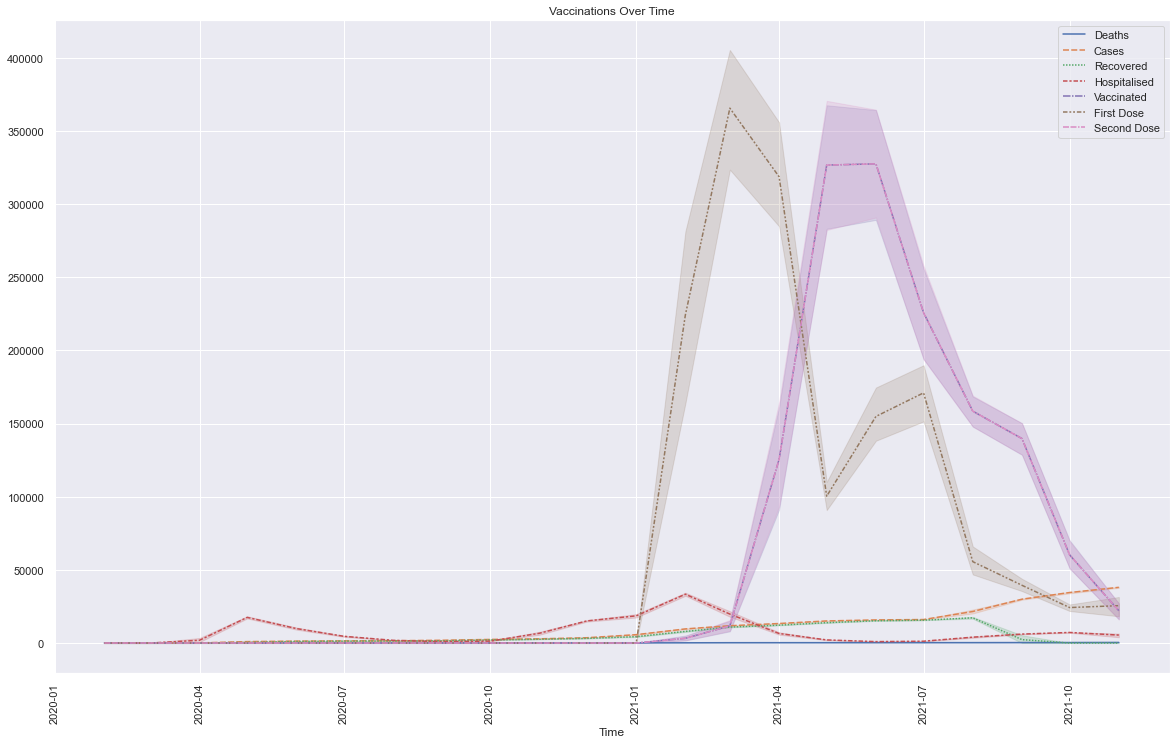

In [28]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,12)})
ax =  sns.lineplot(data=ndf)
ax.set(title='Vaccinations Over Time')
ax.set(xlabel='Time')
plt.xticks(rotation = 90)
plt.show()

In [29]:
df3 = df.groupby(['Province/State']).agg({'Cases': 'sum', 'Deaths': 'sum', 'Hospitalised': 'sum', 'Recovered': 'sum', 'Vaccinated': 'sum', 'First Dose': 'sum', 'Second Dose': 'sum'}).reset_index()
df3.set_index('Province/State')


,Cases,Deaths,Hospitalised,Recovered,Vaccinated,First Dose,Second Dose
Province/State,,,,,,,
Anguilla,35315,24,545540,12708,4709072,4891014.0,4709072
Bermuda,685804,10371,311755,364333,2690908,2794863.0,2690908
British Virgin Islands,284961,3573,571506,64359,4933315,5123920.0,4933315
Cayman Islands,217756,911,389669,152052,3363624,3493578.0,3363624
Channel Islands,1957978,37130,363690,1027626,3139385,3260674.0,3139385
Falkland Islands (Malvinas),20482,0,415650,14754,3587869,3726482.0,3587869
Gibraltar,1413853,25412,649459,956103,5606041,5822624.0,5606041
Isle of Man,887133,15051,467605,328319,4036345,4192307.0,4036345
Montserrat,9556,539,597486,6376,5157560,5356819.0,5157560


In [30]:
df3['First Not Second'] = df3['First Dose'] - df3['Second Dose']
df3['Percentage'] = round((df3['Second Dose'] / df3['First Dose']) * 100, 2)

df3.sort_values(by='First Not Second', ascending=False, inplace=True)
df3

,Province/State,Cases,Deaths,Hospitalised,Recovered,Vaccinated,First Dose,Second Dose,First Not Second,Percentage
6,Gibraltar,1413853,25412,649459,956103,5606041,5822624.0,5606041,216583.0,96.28
8,Montserrat,9556,539,597486,6376,5157560,5356819.0,5157560,199259.0,96.28
2,British Virgin Islands,284961,3573,571506,64359,4933315,5123920.0,4933315,190605.0,96.28
0,Anguilla,35315,24,545540,12708,4709072,4891014.0,4709072,181942.0,96.28
7,Isle of Man,887133,15051,467605,328319,4036345,4192307.0,4036345,155962.0,96.28
5,Falkland Islands (Malvinas),20482,0,415650,14754,3587869,3726482.0,3587869,138613.0,96.28
3,Cayman Islands,217756,911,389669,152052,3363624,3493578.0,3363624,129954.0,96.28
4,Channel Islands,1957978,37130,363690,1027626,3139385,3260674.0,3139385,121289.0,96.28
11,Turks and Caicos Islands,752618,5612,337710,515923,2915136,3027777.0,2915136,112641.0,96.28
1,Bermuda,685804,10371,311755,364333,2690908,2794863.0,2690908,103955.0,96.28


In [31]:
df4 = df.groupby(['Sub-region Name']).agg({'First Dose': 'sum', 'Second Dose': 'sum'}).reset_index()
df4.set_index('Sub-region Name')
df4['Percentage'] = round((df4['Second Dose'] / df4['First Dose']) * 100, 2)
df4

,Sub-region Name,First Dose,Second Dose,Percentage
0,Latin America and the Caribbean,25619590.0,24666576,96.28
1,Northern America,2794863.0,2690908,96.28
2,Northern Europe,12343985.0,11884820,96.28
3,Southern Europe,5822624.0,5606041,96.28


## <u>Findings</u>

<p>There are several anomalies with our data set that need to be taken into account when we review our findings. We need to go over these as possible errors in data and would need to add a low confidence margin to any finding below</p>

<p><u><strong>OTHERS</strong> is going to skew our dataset so we should remove it from all analysis</u></p>

- Normalised vaccinations and hospital admissions charts show that every Province has an exact match to the other in terms of shape. This is impossible in the real world and there would be variances. We should look into the source of this data and find errors
-  Gibraltar, Turs and Caicos Islands Isle of Man and British Virgin Islands all have a significat spike in cases mid way through our timeframe. We should look into this further. 
- Anguilla, Montserrat, Cayman Islands and Stain Helena, Ascension and Tristian de Cunha all have very weird plots for the normalised deaths. We should look into this further
- Falkland Islands has had no deaths. This could be an error. 
- Our recovery data looks incomplete. We need to look at why the data suddenly stops todards the end of the data set. 
- Many of the normalised graphs in the dataframe have a step pattern which is not possible from complete data of the nature we are dealing with. We should look at the raw data to see if there are missing or incorret values within it. 

### Insights
- Anguilla, The Isle of Man and British Virgin Islands controlled the spread of infection the best
- The Falkland Islands had not deaths
- Montesrrat had the most deaths per capita.
- There is a odd spike in hospital admissions at the start of the pandemic. There is also a major spike towards the end of 2020. This is then followed by a major drop in admissions. This would impy that the hospital beds were full and it has a direct correlation to the rise in death rates across all regions. 
- Apart from Others, who only had recovered patinets at the start of the pandemic the rest of the countries had recovery in-line with the rise in infection rates. 



---
## 4) Assignment activity 4: 

In [32]:
df3['Interest']= round(df3['First Not Second']*100/df3['First Dose'], 2)

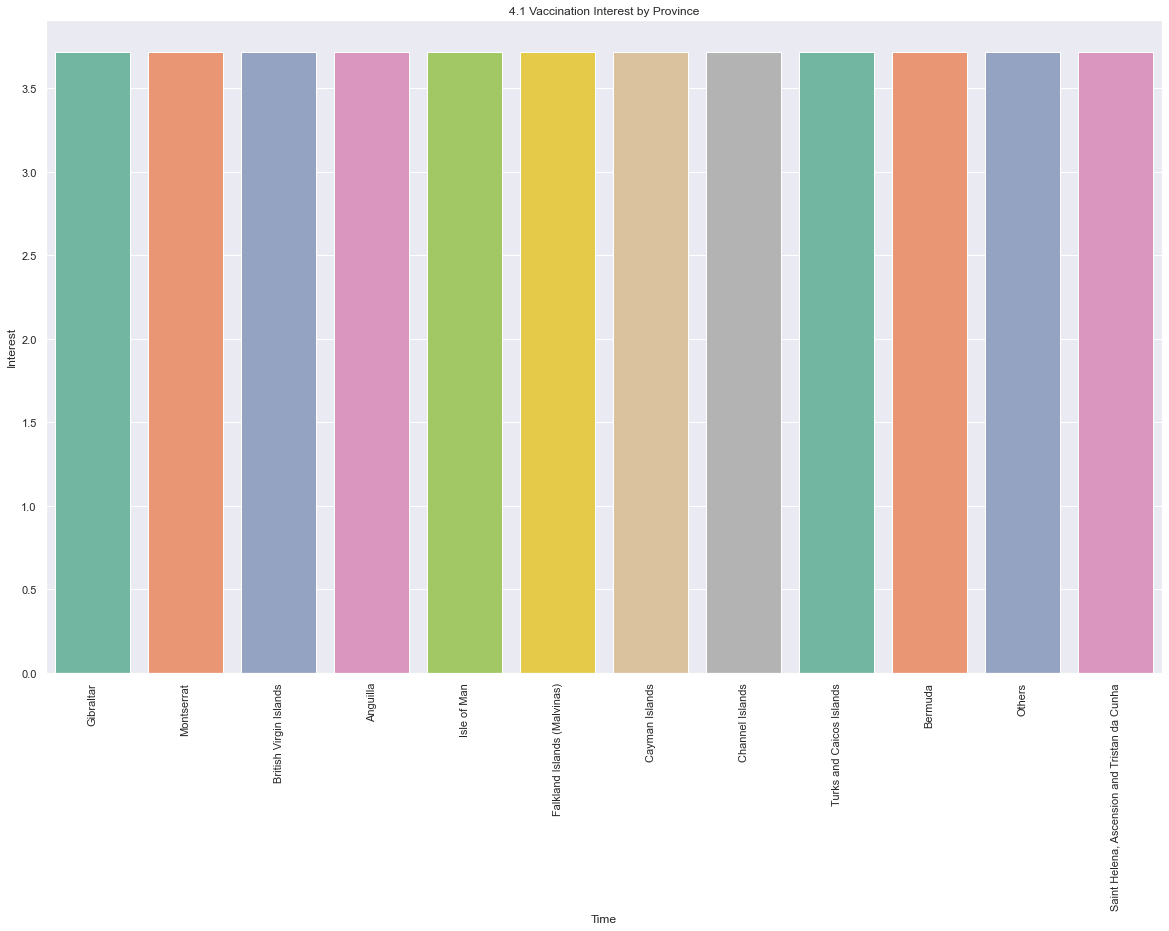

In [33]:

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,12)})
ax =  sns.barplot(x='Province/State', y='Interest', data=df3, palette='Set2')
ax.set(title='4.1 Vaccination Interest by Province')
ax.set(xlabel='Time')
plt.xticks(rotation = 90)
plt.show()

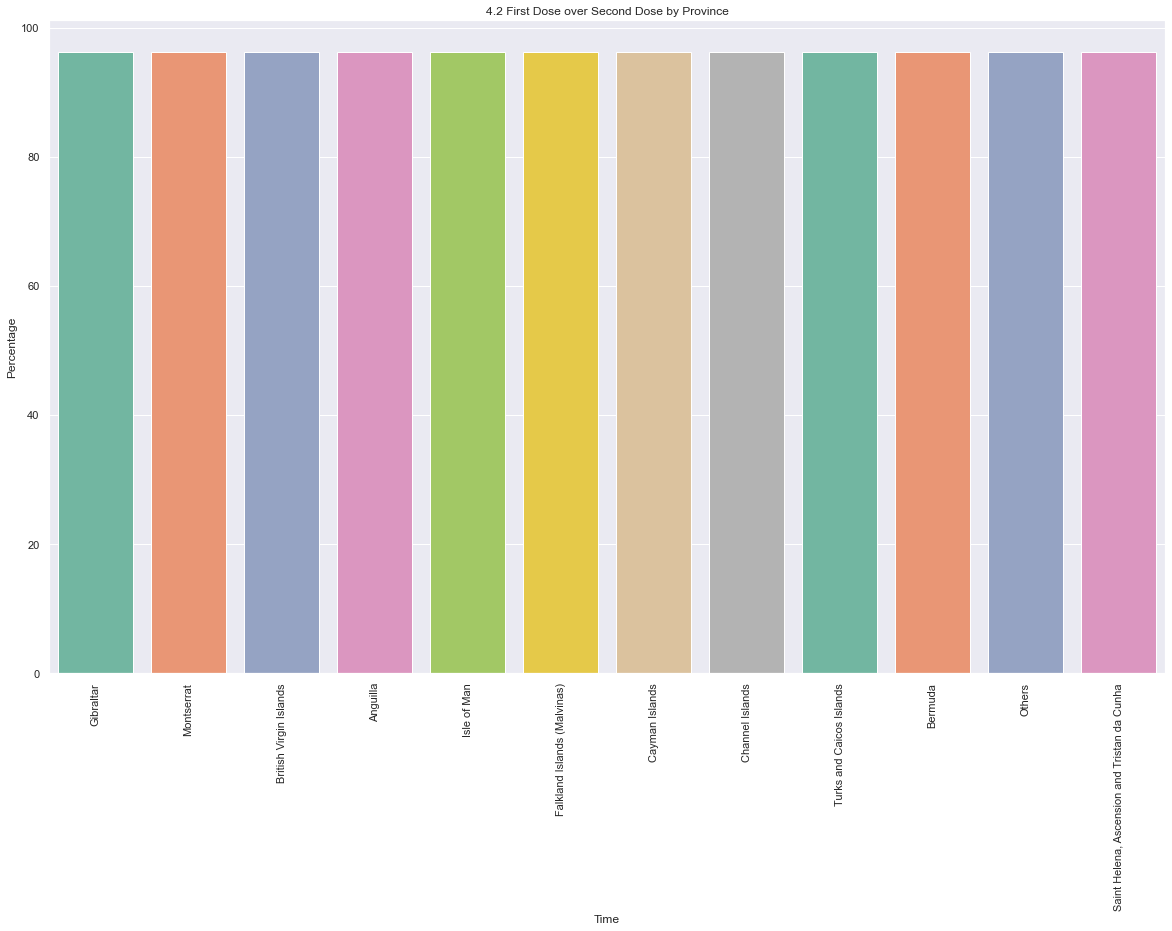

In [34]:

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,12)})
ax =  sns.barplot(x='Province/State', y='Percentage', data=df3, palette='Set2')
ax.set(title='4.2 First Dose over Second Dose by Province')
ax.set(xlabel='Time')
plt.xticks(rotation = 90)
plt.show()

In [35]:
df.dtypes

Date               datetime64[ns]
Province/State             object
Country/Region             object
Sub-region Name            object
Deaths                      int32
Cases                       int32
Recovered                   int32
Hospitalised                int32
Vaccinated                  int64
First Dose                float64
Second Dose                 int64
dtype: object

In [36]:
deaths_df = df.copy()
deaths_df.drop(['Country/Region', 'Sub-region Name', 'Cases', 'Recovered', 'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'], axis=1, inplace=True)

In [37]:
deaths_pivot = deaths_df.pivot_table(index='Date', columns='Province/State', values='Deaths').reset_index()
deaths_pivot.set_index('Date', inplace=True)

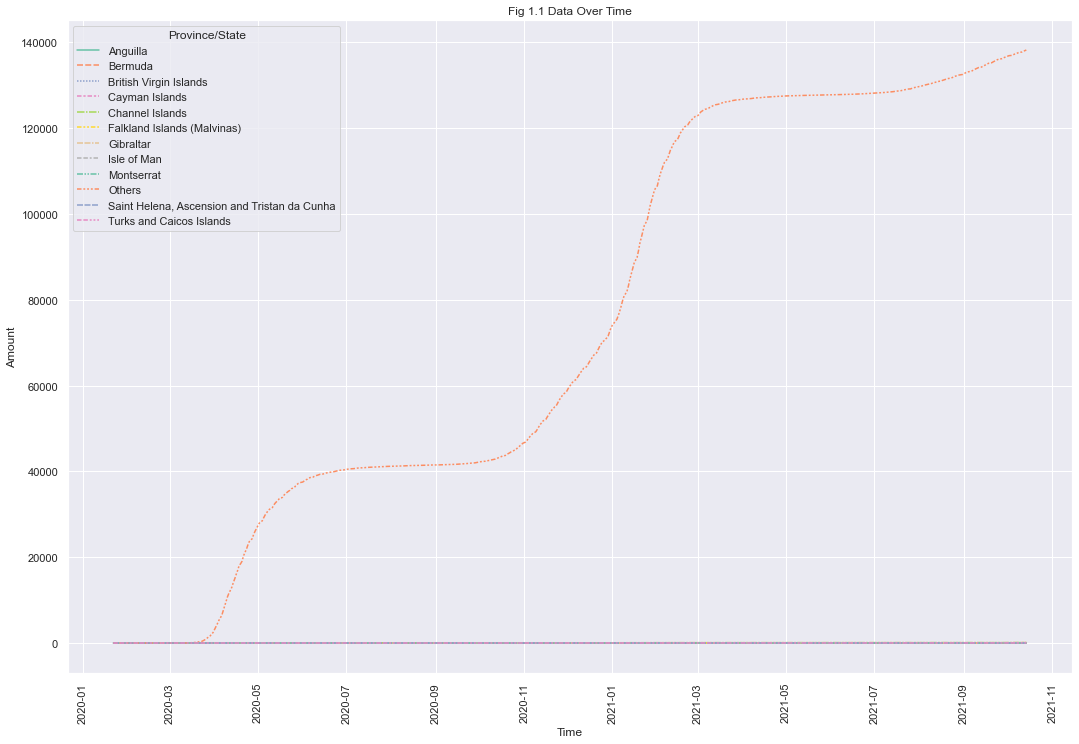

In [38]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=deaths_pivot, palette='Set2') 
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()

In [39]:
deaths_pivot2 = deaths_df[(deaths_df['Province/State'] != 'Others')].pivot_table(index='Date', columns='Province/State', values='Deaths').reset_index()
deaths_pivot2['Month']=pd.to_datetime(deaths_pivot2['Date']+pd.offsets.MonthBegin(0))
deaths_pivot2.set_index('Month', inplace=True)

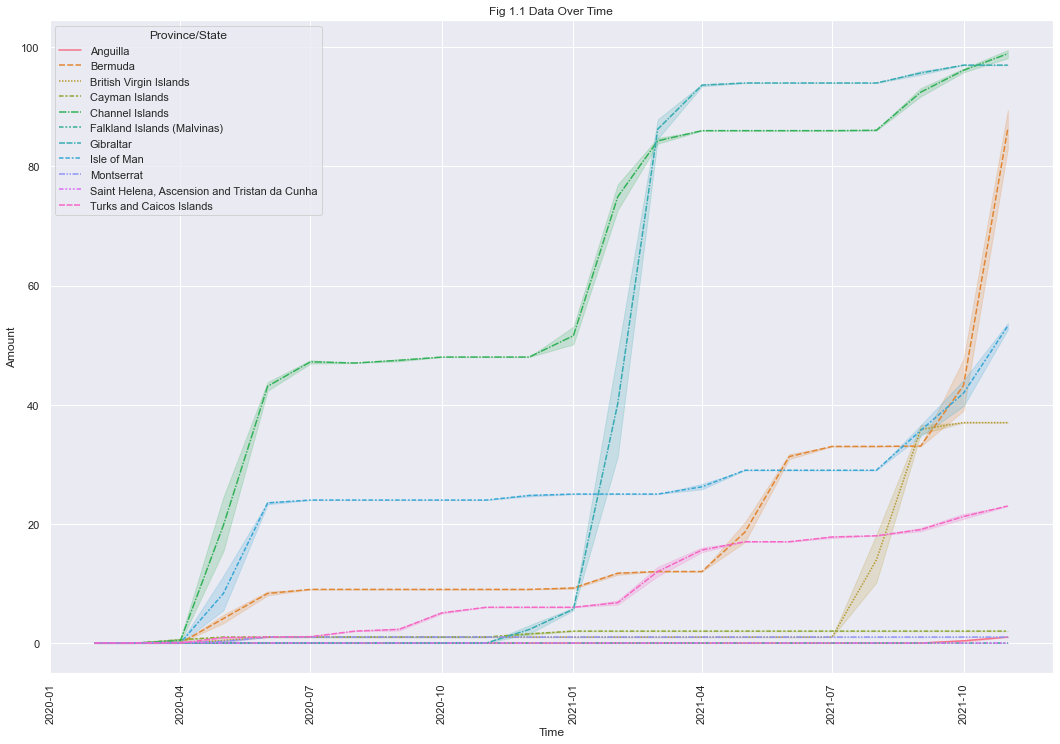

In [40]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=deaths_pivot2 )
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()

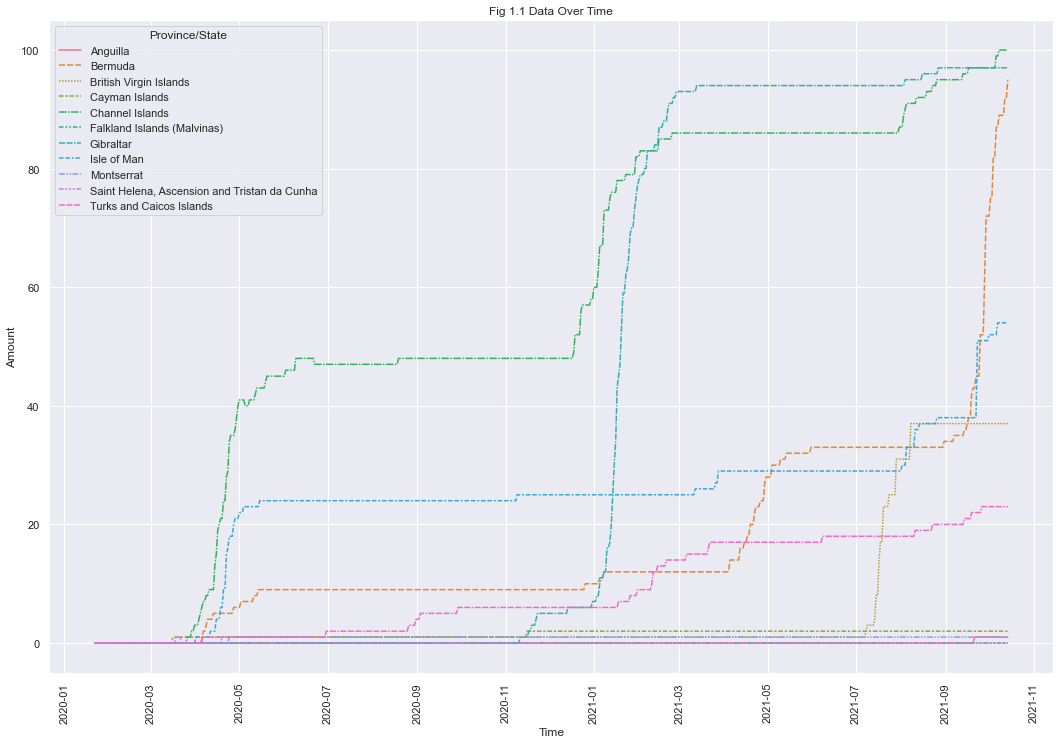

In [41]:
deaths_pivot2.set_index('Date', inplace=True)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=deaths_pivot2 )
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()

In [42]:
df3[['Province/State', 'Recovered']].sort_values(by='Recovered', ascending=False)

,Province/State,Recovered
4,Channel Islands,1027626
6,Gibraltar,956103
11,Turks and Caicos Islands,515923
1,Bermuda,364333
7,Isle of Man,328319
3,Cayman Islands,152052
2,British Virgin Islands,64359
5,Falkland Islands (Malvinas),14754
0,Anguilla,12708
8,Montserrat,6376


In [43]:
recovered_df = df.copy()
recovered_df.drop(['Country/Region', 'Sub-region Name', 'Cases', 'Deaths', 'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'], axis=1, inplace=True)
recovered_pivot = deaths_df[(recovered_df['Province/State'] != 'Others')].pivot_table(index='Date', columns='Province/State', values='Deaths').reset_index()
recovered_pivot['Month']=pd.to_datetime(recovered_pivot['Date']+pd.offsets.MonthBegin(0))
recovered_pivot.set_index('Month', inplace=True)

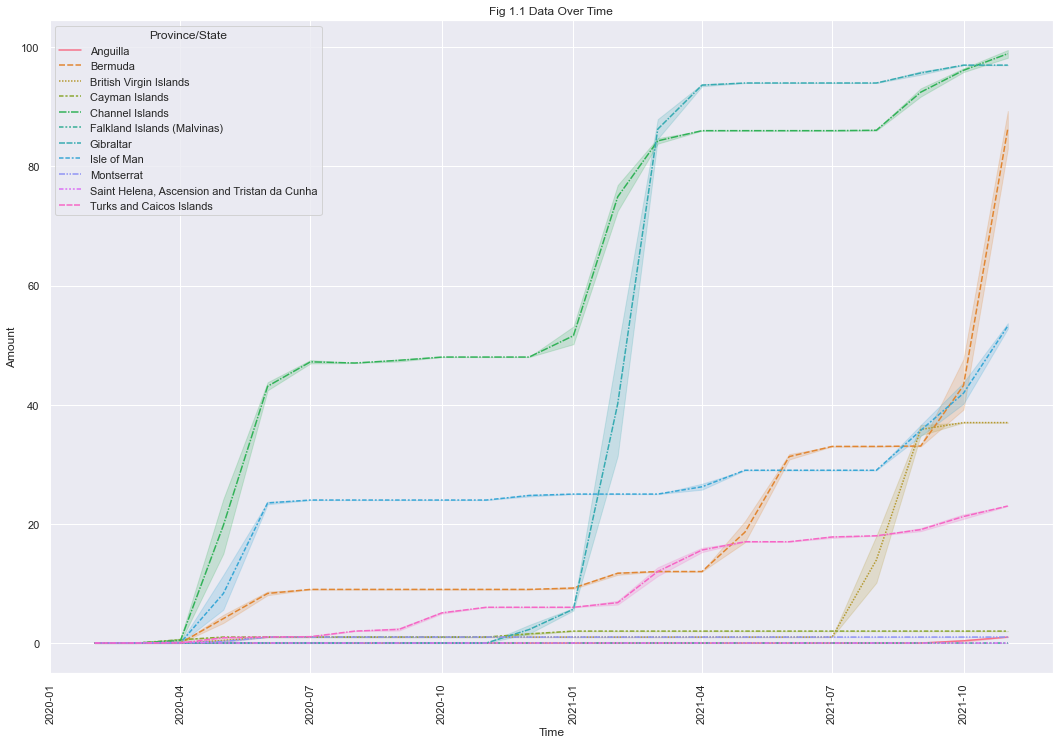

In [44]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=recovered_pivot) 
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()

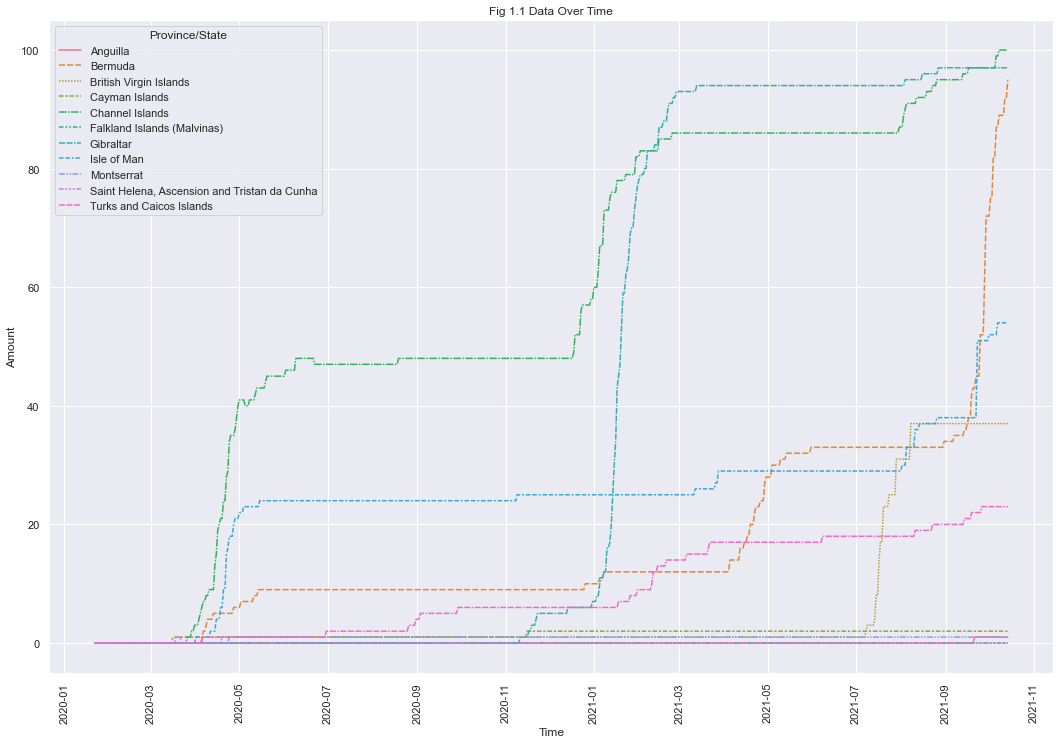

In [45]:
recovered_pivot.set_index('Date', inplace=True)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

ax =  sns.lineplot(data=recovered_pivot) 
ax.set(title='Fig 1.1 Data Over Time')
ax.set(xlabel='Time')
ax.set(ylabel='Amount')
ax.xaxis_date
plt.xticks(rotation = 90)
plt.show()